# Metadata

```{yaml}
Course:   DS 5001 Exploratory Text Analytics
Module:   01 Getting Started
Topic:    M01 Homework
Author:   Anne Louise Seekford
Date:     21 January 2023
```

In [3]:
import pandas as pd

In [7]:
lines = open('pg42324.txt', 'r').readlines()
#lines

In [8]:
text = pd.DataFrame(lines)
text

,0
0,"﻿The Project Gutenberg EBook of Frankenstein, ..."
1,\n
2,This eBook is for the use of anyone anywhere a...
3,almost no restrictions whatsoever. You may co...
4,re-use it under the terms of the Project Guten...
...,...
8023,\n
8024,This Web site includes information about Proje...
8025,including how to make donations to the Project...
8026,"Archive Foundation, how to help produce our ne..."


In [12]:
text.columns = ['line_str']
text.index.name = 'line_num'
#text

,line_str
line_num,
0,"﻿The Project Gutenberg EBook of Frankenstein, ..."
1,\n
2,This eBook is for the use of anyone anywhere a...
3,almost no restrictions whatsoever. You may co...
4,re-use it under the terms of the Project Guten...
...,...
8023,\n
8024,This Web site includes information about Proje...
8025,including how to make donations to the Project...


<AxesSubplot:>

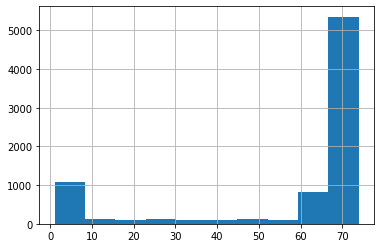

In [14]:
text['len'] = text.line_str.str.len() # get length of each line (i.e. num of characters in each line)
text.len.hist()

We might have extra new lines...

In [15]:
text[text['len'] < 5].sample(10) # Get every row where length is less than 5

,line_str,len
line_num,,
2371,\n,1
3648,\n,1
2050,\n,1
7653,\n,1
2297,\n,1
4491,\n,1
335,\n,1
6290,\n,1
3618,\n,1


In [22]:
chunk_pat = '\n\n' # Pattern of two new lines
chunks = open('pg42324.txt', 'r').read().split(chunk_pat) # Read takes in the file as one long big string, so need to split
# chunks
text = pd.DataFrame(chunks, columns=['chunk_str'])
text.index.name = 'chunk_id'
# text

,chunk_str
chunk_id,
0,"﻿The Project Gutenberg EBook of Frankenstein, ..."
1,This eBook is for the use of anyone anywhere a...
2,"\nTitle: Frankenstein\n or, The Modern P..."
3,Author: Mary W. Shelley
4,"Release Date: March 13, 2013 [EBook #42324]"
...,...
937,Professor Michael S. Hart was the originator o...
938,Project Gutenberg-tm eBooks are often created ...
939,Most people start at our Web site which has th...


In [23]:
text.chunk_str = text.chunk_str.str.replace('\n+', ' ', regex=True).str.strip() # Get rid of all the new lines

# 1. How many tokens does the raw text have? 
 By raw text, we mean the text as-is, without all of the Gutenberg boilerplate removed.

In [26]:
K = text.chunk_str.str.split(expand=True).stack().to_frame('token_str') # Tokenize paragraph chunks
K.index.names = ['chunk_num','token_num'] #, and keep track of each paragraph
K

token_str
chunk_num token_num           
0         0               ﻿The
          1            Project
          2          Gutenberg
          3              EBook
          4                 of
...                        ...
941       35                to
          36              hear
          37             about
          38               new
          39           eBooks.

[80985 rows x 1 columns]

In [27]:
K.shape[0]

80985

So, there are 80,985 tokens in the text.

In [28]:
K['term_str'] = K.token_str.str.replace(r'\W+', '', regex=True).str.lower() # \W means alphanumeric characters
K

token_str   term_str
chunk_num token_num                      
0         0               ﻿The        the
          1            Project    project
          2          Gutenberg  gutenberg
          3              EBook      ebook
          4                 of         of
...                        ...        ...
941       35                to         to
          36              hear       hear
          37             about      about
          38               new        new
          39           eBooks.     ebooks

[80985 rows x 2 columns]

Now let's get the unqiue values/words

In [44]:
V = K.term_str.value_counts().to_frame('n')
V.index.name = 'term_str'
V

,n
term_str,
the,4575
and,3120
of,2918
i,2918
to,2257
...,...
appreciate,1
fastidious,1
retirement,1


In [45]:
V.shape[0]

7858

7,858 unqiue words.

# 2. What is the most frequent pronoun in the text?

In [40]:
V.head(20)

,n,p
term_str,,
the,4575,0.056492
and,3120,0.038526
of,2918,0.036031
i,2918,0.036031
to,2257,0.027869
my,1819,0.022461
a,1497,0.018485
in,1232,0.015213
was,1064,0.013138


In [42]:
# Relative frequency
V['p'] = V.n / V.n.sum()

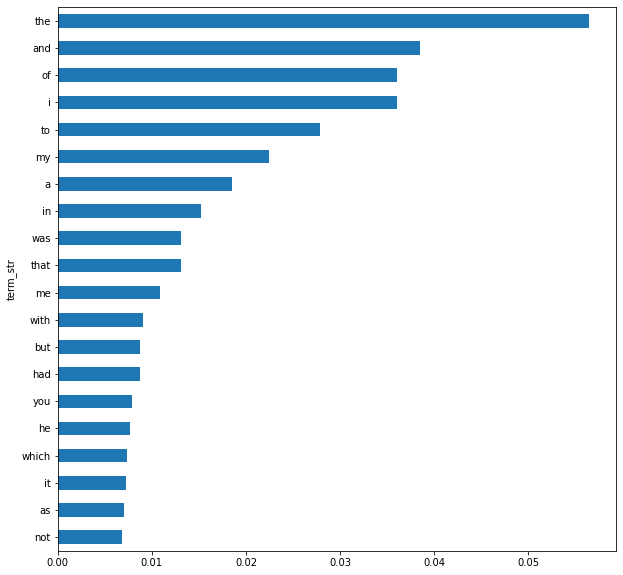

In [43]:
# Frequency of terms
V.p.head(20).sort_values().plot.barh(figsize=(10,10));

First is "me", second is "he"!

# 3. Which subject pronoun is most frequent in the text we imported in class?

From the text file imported in class (`pg105.txt`), "she" is the most frequent subject pronoun!

# 4. Provide a brief explanation for this difference, based on what you may know about the two novels.

I'm not too familiar with Persuasion by Jane Austen, but the "me" and "he" being the most common pronouns in Frankenstein makes sense. Considering what I generally know about the book, it is from the perspective of a scientist (me) creating this monster, Frankenstein (he). Based on "she" being the most common pronoun in Persuasion, I would guess that it may be a romance novel.